In [ ]:
import pandas as pd

# Reading the file 'responses.tsv' into a pandas dataframe with no headers and naming the column 'utterance'
df_responses = pd.read_csv('responses.tsv', sep='\t', header=None, names=['utterance'])
df_responses.head()

,utterance
0,En person eller en grupp utsätts för rasism
1,Aggression
2,Använder inte det ordet
3,"Är osäker på betydelsen, men är det indelninge..."
4,Att behndla någon annorlunda för sin ras


In [ ]:
# Create a new column 'id' and populate it with the row indices of the dataframe
df_responses['id'] = df_responses.index
df_responses.head()

,utterance,utterance_en,utterance_en_oai,analysis_pos,id
0,En person eller en grupp utsätts för rasism,A person or group exposed to racism,(one or a group is exposed to racism) (Min nan...,"[{'token': 'En', 'pos': 'DET'}, {'token': 'per...",0
1,Aggression,Aggression,Pay attention to the tone of voice the actors ...,"[{'token': 'Aggression', 'pos': 'NOUN'}]",1
2,Använder inte det ordet,Does not use that word,androm ' i det svenska språket. yell\n\nRensa ...,"[{'token': 'Använder', 'pos': 'VERB'}, {'token...",2
3,"Är osäker på betydelsen, men är det indelninge...","Are unsure of the meaning, but is it the divis...","is uncertain in meaning, but is that the class...","[{'token': 'Är', 'pos': 'AUX'}, {'token': 'osä...",3
4,Att behndla någon annorlunda för sin ras,To treat someone differently for their race,år en diskrimineringsgrund. Mannen som gick på...,"[{'token': 'Att', 'pos': 'PART'}, {'token': 'b...",4


In [ ]:
import spacy
import pandas as pd

# Load the Swedish language model
nlp = spacy.load('sv_core_news_sm')

# Tokenize each utterance, check if it's a stopword, and extract token, lemma, and original ID
rows = []
for index, row in df_responses.iterrows():
    doc = nlp(row['utterance'])
    for token in doc:
        if not token.is_stop and not token.is_punct:
            rows.append({
                'id': row['id'],
                'token': token.text,
                'lemma': token.lemma_
            })

# Create a new dataframe from the rows
df_tokens_lemma_no_stopwords = pd.DataFrame(rows)

df_tokens_lemma_no_stopwords.head()


,id,token,lemma
0,0,person,person
1,0,grupp,grupp
2,0,utsätts,utsätta
3,0,rasism,rasism
4,1,Aggression,aggression


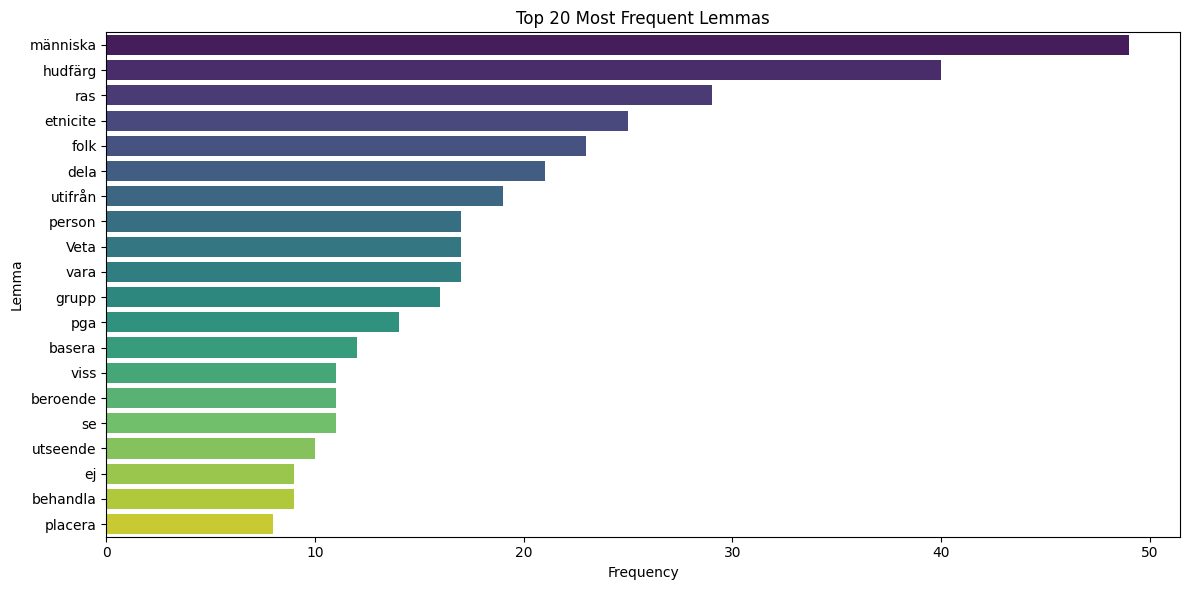

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by 'lemma' and count occurrences
lemma_counts = df_tokens_lemma_no_stopwords.groupby('lemma').size().reset_index(name='count')

# Sort by count and take the top 20 lemmas
top_20_lemmas = lemma_counts.sort_values(by='count', ascending=False).head(20)

# Plotting the top 20 lemmas using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=top_20_lemmas, x='count', y='lemma', palette='viridis')
plt.title('Top 20 Most Frequent Lemmas')
plt.xlabel('Frequency')
plt.ylabel('Lemma')
plt.tight_layout()
plt.show()


In [ ]:
!pip install -q googletrans==4.0.0-rc1

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 5.9 MB/s eta 0:00:00


In [ ]:
from googletrans import Translator

# Initialize the translator
translator = Translator()

# Translate the 'utterance' column to English and store in a new column 'utterance_en'
df_responses['utterance_en'] = df_responses['utterance'].apply(lambda x: translator.translate(x, src='sv', dest='en').text)
df_responses.head()

,utterance,utterance_en
0,En person eller en grupp utsätts för rasism,A person or group exposed to racism
1,Aggression,Aggression
2,Använder inte det ordet,Does not use that word
3,"Är osäker på betydelsen, men är det indelninge...","Are unsure of the meaning, but is it the divis..."
4,Att behndla någon annorlunda för sin ras,To treat someone differently for their race


In [ ]:
!pip install -q openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 1.8 MB/s eta 0:00:00


In [ ]:
import openai
openai.api_key = "..."

#model = openai.Completion.create(engine="davinci", prompt=prompt, stop="\n", temperature=0.9, max_tokens=100)

# Function to translate Swedish to English using OpenAI
def translate_to_english(text):
    response = openai.Completion.create(
      engine="davinci",
      prompt=f"Translate the following Swedish text to English: '{text}'",
      max_tokens=100
    )
    return response.choices[0].text.strip()

# Apply the translation function to the 'utterance' column
df_responses['utterance_en_oai'] = df_responses['utterance'].apply(translate_to_english)
df_responses.head()

,utterance,utterance_en,utterance_en_oai
0,En person eller en grupp utsätts för rasism,A person or group exposed to racism,(one or a group is exposed to racism) (Min nan...
1,Aggression,Aggression,Pay attention to the tone of voice the actors ...
2,Använder inte det ordet,Does not use that word,androm ' i det svenska språket. yell\n\nRensa ...
3,"Är osäker på betydelsen, men är det indelninge...","Are unsure of the meaning, but is it the divis...","is uncertain in meaning, but is that the class..."
4,Att behndla någon annorlunda för sin ras,To treat someone differently for their race,år en diskrimineringsgrund. Mannen som gick på...


In [ ]:
import spacy

# Download the small Swedish language model for spaCy
!python -m spacy download sv_core_news_sm

# Load the Swedish language model
nlp = spacy.load('sv_core_news_sm')


2023-10-06 10:54:21.375053: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 54.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('sv_core_news_sm')


In [ ]:

# Function to perform POS analysis
def pos_analysis(text):
    doc = nlp(text)
    return [{'token': token.text, 'pos': token.pos_} for token in doc]

# Apply the POS analysis function to the 'utterance' column
df_responses['analysis_pos'] = df_responses['utterance'].apply(pos_analysis)
df_responses.head()

,utterance,utterance_en,utterance_en_oai,analysis_pos
0,En person eller en grupp utsätts för rasism,A person or group exposed to racism,(one or a group is exposed to racism) (Min nan...,"[{'token': 'En', 'pos': 'DET'}, {'token': 'per..."
1,Aggression,Aggression,Pay attention to the tone of voice the actors ...,"[{'token': 'Aggression', 'pos': 'NOUN'}]"
2,Använder inte det ordet,Does not use that word,androm ' i det svenska språket. yell\n\nRensa ...,"[{'token': 'Använder', 'pos': 'VERB'}, {'token..."
3,"Är osäker på betydelsen, men är det indelninge...","Are unsure of the meaning, but is it the divis...","is uncertain in meaning, but is that the class...","[{'token': 'Är', 'pos': 'AUX'}, {'token': 'osä..."
4,Att behndla någon annorlunda för sin ras,To treat someone differently for their race,år en diskrimineringsgrund. Mannen som gick på...,"[{'token': 'Att', 'pos': 'PART'}, {'token': 'b..."


In [ ]:
# Create a new column 'id' and populate it with the row indices of the dataframe
df_responses['id'] = df_responses.index
df_responses.head()

,utterance,utterance_en,utterance_en_oai,analysis_pos,id
0,En person eller en grupp utsätts för rasism,A person or group exposed to racism,(one or a group is exposed to racism) (Min nan...,"[{'token': 'En', 'pos': 'DET'}, {'token': 'per...",0
1,Aggression,Aggression,Pay attention to the tone of voice the actors ...,"[{'token': 'Aggression', 'pos': 'NOUN'}]",1
2,Använder inte det ordet,Does not use that word,androm ' i det svenska språket. yell\n\nRensa ...,"[{'token': 'Använder', 'pos': 'VERB'}, {'token...",2
3,"Är osäker på betydelsen, men är det indelninge...","Are unsure of the meaning, but is it the divis...","is uncertain in meaning, but is that the class...","[{'token': 'Är', 'pos': 'AUX'}, {'token': 'osä...",3
4,Att behndla någon annorlunda för sin ras,To treat someone differently for their race,år en diskrimineringsgrund. Mannen som gick på...,"[{'token': 'Att', 'pos': 'PART'}, {'token': 'b...",4


In [ ]:
#import spacy
#import pandas as pd

# Load the Swedish language model
#nlp = spacy.load('sv_core_news_sm')

# Tokenize each utterance and extract token, POS tag, entity, and original ID
rows = []
for index, row in df_responses.iterrows():
    doc = nlp(row['utterance'])
    for token in doc:
        rows.append({
            'id': row['id'],
            'token': token.text,
            'pos': token.pos_,
            'entity': token.ent_type_ if token.ent_type_ else 'None'
        })

# Create a new dataframe from the rows
df_tokens = pd.DataFrame(rows)

df_tokens.head()


,id,token,pos,entity
0,0,En,DET,None
1,0,person,NOUN,None
2,0,eller,CCONJ,None
3,0,en,DET,None
4,0,grupp,NOUN,None


In [ ]:
#import spacy
#import pandas as pd

# Download the English language model for spaCy
!python -m spacy download en_core_web_sm

# Load the English language model
nlp_en = spacy.load('en_core_web_sm')

# Tokenize each utterance in 'utterance_en' and extract token, POS tag, entity, and original ID
rows_en = []
for index, row in df_responses.iterrows():
    # Assuming the 'utterance_en' column exists in the df_responses dataframe
    doc = nlp_en(row['utterance_en'])
    for token in doc:
        rows_en.append({
            'id': row['id'],
            'token': token.text,
            'pos': token.pos_,
            'entity': token.ent_type_ if token.ent_type_ else 'None'
        })

# Create a new dataframe from the rows
tokens_en = pd.DataFrame(rows_en)

tokens_en.head()


2023-10-06 11:23:59.055405: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 42.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


,id,token,pos,entity
0,0,A,DET,None
1,0,person,NOUN,None
2,0,or,CCONJ,None
3,0,group,NOUN,None
4,0,exposed,VERB,None


In [ ]:
# Write the modified dataframe to a TSV file
output_filename = 'scom-gpols-race-resp-trans.tsv'
df_responses.to_csv(output_filename, sep='\t', index=False)
output_filename

'scom-gpols-race-resp-trans.tsv'

In [ ]:
# Write the modified dataframe to a TSV file
output_filename = 'scom-gpols-race-resp-tokens-sv.tsv'
df_tokens.to_csv(output_filename, sep='\t', index=False)
output_filename

'scom-gpols-race-resp-tokens-sv.tsv'

In [ ]:
# Write the modified dataframe to a TSV file
output_filename = 'scom-gpols-race-resp-tokens-en.tsv'
tokens_en.to_csv(output_filename, sep='\t', index=False)
output_filename

'scom-gpols-race-resp-tokens-en.tsv'

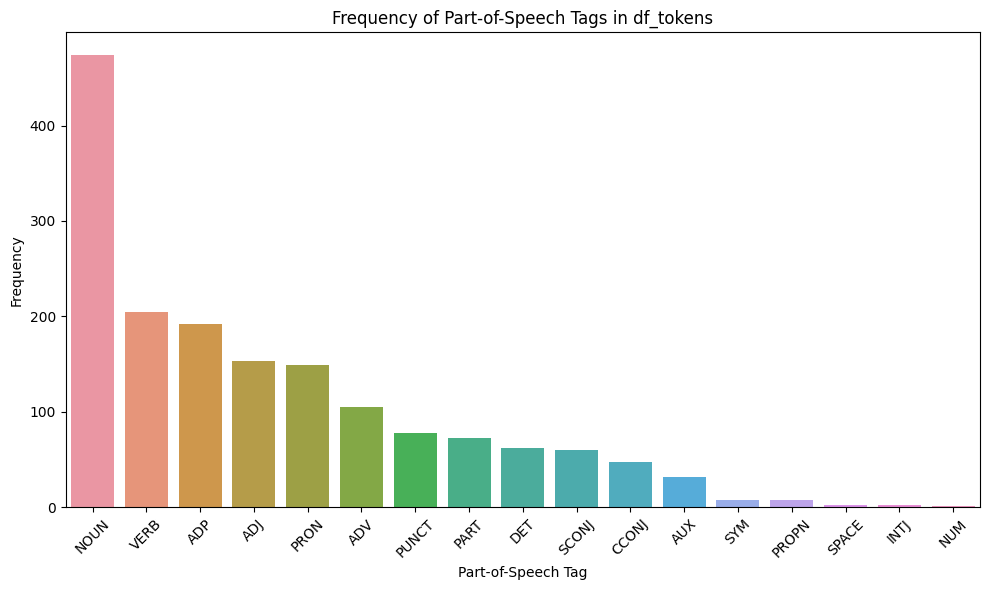

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_tokens is the dataframe with the tokenized data
# Plotting the frequency diagram for the 'pos' column
plt.figure(figsize=(10, 6))
sns.countplot(data=df_tokens, x='pos', order=df_tokens['pos'].value_counts().index)
plt.title('Frequency of Part-of-Speech Tags in df_tokens')
plt.ylabel('Frequency')
plt.xlabel('Part-of-Speech Tag')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Group by 'id' and 'pos' and count the occurrences of each 'pos' for each 'id'
pos_counts = df_tokens.groupby(['id', 'pos']).size().reset_index(name='pos_count')

# Pivot the dataframe to have 'id' as index, 'pos' as columns, and 'pos_count' as values
pivot_pos_counts = pos_counts.pivot(index='id', columns='pos', values='pos_count').fillna(0).reset_index()

# Merge the pivot dataframe with the original df_tokens to add the counts of each unique 'pos' value
df_tokens_merged = pd.merge(df_tokens, pivot_pos_counts, on='id', how='left')

df_tokens_merged.head()


,id,token,pos,entity,ADJ,ADP,ADV,AUX,CCONJ,DET,...,NOUN,NUM,PART,PRON,PROPN,PUNCT,SCONJ,SPACE,SYM,VERB
0,0,En,DET,None,0.0,1.0,0.0,0.0,1.0,2.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,person,NOUN,None,0.0,1.0,0.0,0.0,1.0,2.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,eller,CCONJ,None,0.0,1.0,0.0,0.0,1.0,2.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,en,DET,None,0.0,1.0,0.0,0.0,1.0,2.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,grupp,NOUN,None,0.0,1.0,0.0,0.0,1.0,2.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
df_tokens_merged.shape

(1650, 21)

In [ ]:
# Group by 'id' and concatenate the tokens
concat_tokens = df_tokens.groupby('id')['token'].apply(' '.join).reset_index(name='concat_tokens')

# Group by 'id' and 'pos' and count the occurrences of each 'pos' for each 'id'
pos_counts = df_tokens.groupby(['id', 'pos']).size().reset_index(name='pos_count')

# Pivot the dataframe to have 'id' as index, 'pos' as columns, and 'pos_count' as values
pivot_pos_counts = pos_counts.pivot(index='id', columns='pos', values='pos_count').fillna(0).reset_index()

# Merge the concatenated tokens and pivot dataframe
result_df = pd.merge(concat_tokens, pivot_pos_counts, on='id', how='left')

result_df.head()


,id,concat_tokens,ADJ,ADP,ADV,AUX,CCONJ,DET,INTJ,NOUN,NUM,PART,PRON,PROPN,PUNCT,SCONJ,SPACE,SYM,VERB
0,0,En person eller en grupp utsätts för rasism,0.0,1.0,0.0,0.0,1.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,Aggression,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,Använder inte det ordet,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3,"Är osäker på betydelsen , men är det indelning...",2.0,2.0,0.0,2.0,1.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,1.0,2.0
4,4,Att behndla någon annorlunda för sin ras,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0


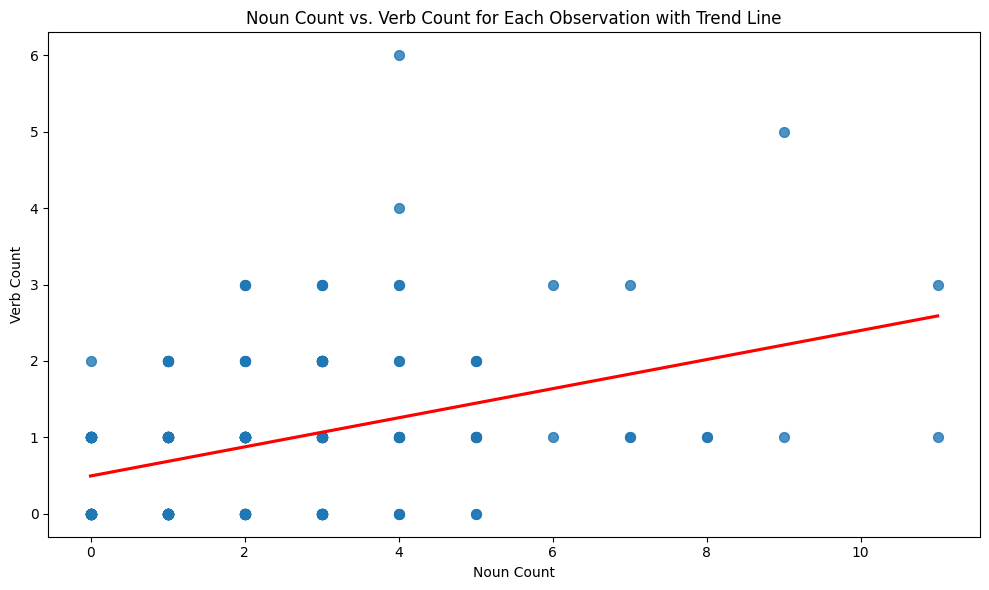

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'NOUN' and 'VERB' are the POS tags for nouns and verbs in the dataframe
# If the tags are different, please replace 'NOUN' and 'VERB' with the appropriate tags

plt.figure(figsize=(10, 6))
sns.regplot(data=result_df, x='NOUN', y='VERB', scatter_kws={'s': 50}, line_kws={'color': 'red'}, ci=None)
plt.title('Noun Count vs. Verb Count for Each Observation with Trend Line')
plt.xlabel('Noun Count')
plt.ylabel('Verb Count')
plt.tight_layout()
plt.show()


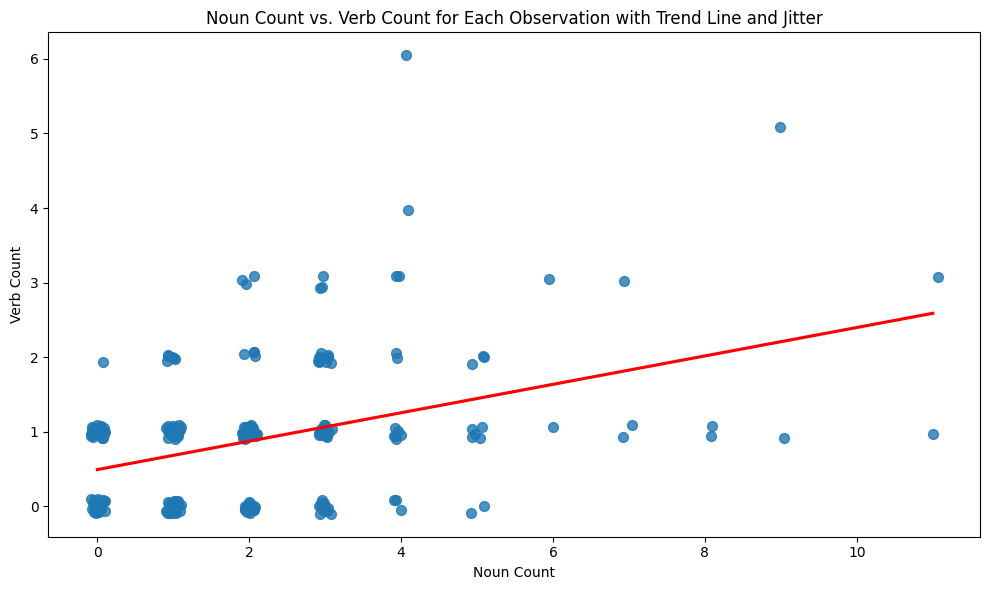

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'NOUN' and 'VERB' are the POS tags for nouns and verbs in the dataframe
# If the tags are different, please replace 'NOUN' and 'VERB' with the appropriate tags

plt.figure(figsize=(10, 6))
sns.regplot(data=result_df, x='NOUN', y='VERB', scatter_kws={'s': 50}, line_kws={'color': 'red'}, ci=None, x_jitter=0.1, y_jitter=0.1)
plt.title('Noun Count vs. Verb Count for Each Observation with Trend Line and Jitter')
plt.xlabel('Noun Count')
plt.ylabel('Verb Count')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

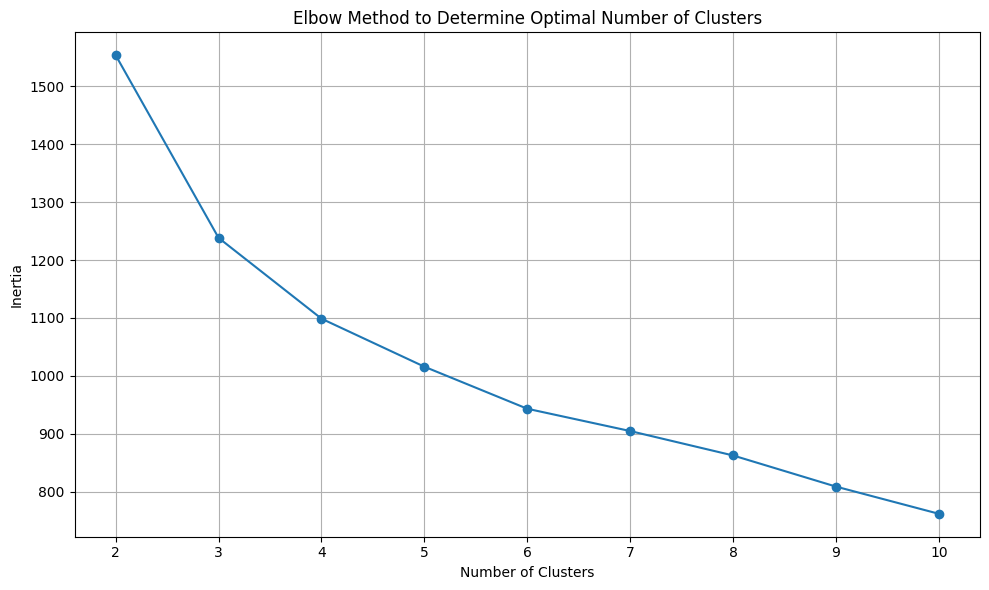

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Extracting numerical columns from 'ADJ' through 'VERB' in the result_df dataframe
data = result_df.loc[:, 'ADJ':'VERB']

# List to store the inertia for each number of clusters
inertia_list = []

# Iterate for cluster counts ranging from 2 to 10
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data)
    inertia_list.append(kmeans.inertia_)

# Plotting the inertia for each number of clusters to determine the best number of clusters using the elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), inertia_list, marker='o')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(2, 11))
plt.grid(True)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


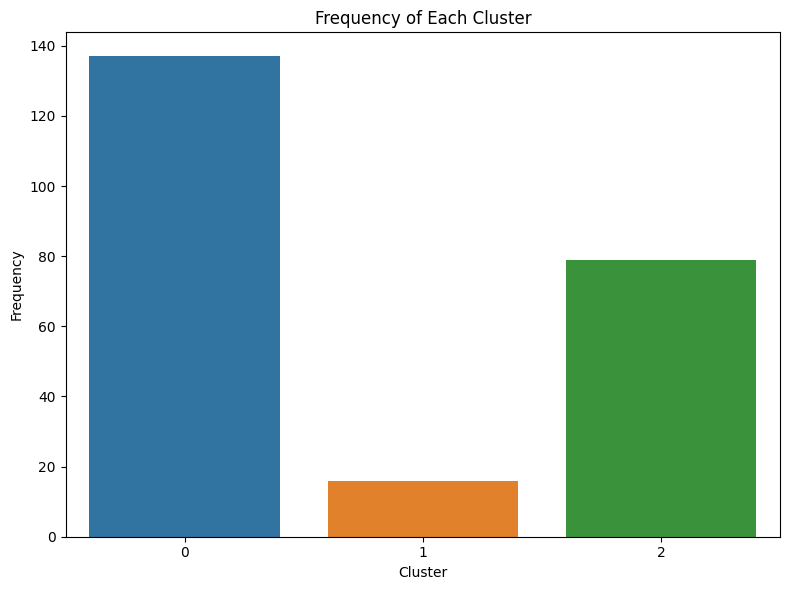

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Extracting numerical columns from 'ADJ' through 'VERB' in the result_df dataframe
data = result_df.loc[:, 'ADJ':'VERB']

# Running KMeans clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
result_df['cluster'] = kmeans.fit_predict(data)

# Plotting the frequency of each cluster using seaborn
plt.figure(figsize=(8, 6))
sns.countplot(data=result_df, x='cluster')
plt.title('Frequency of Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [ ]:
# Save the result_df to a TSV file
output_file = 'scom-gpols-race-resp-cluster.tsv'
result_df.to_csv(output_file, sep='\t', index=False)


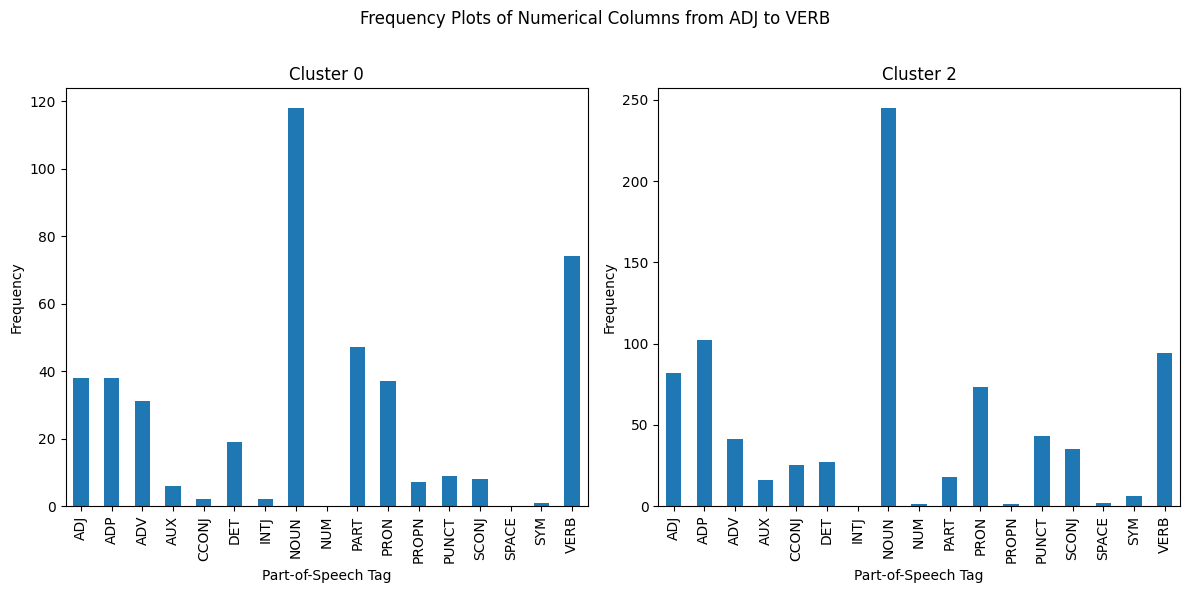

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for cluster 0 and 2
cluster_0_data = result_df[result_df['cluster'] == 0]
cluster_2_data = result_df[result_df['cluster'] == 2]

# Plotting for cluster 0
plt.figure(figsize=(12, 6))
plt.suptitle('Frequency Plots of Numerical Columns from ADJ to VERB')

# Subplot for cluster 0
plt.subplot(1, 2, 1)
cluster_0_data.loc[:, 'ADJ':'VERB'].sum().plot(kind='bar')
plt.title('Cluster 0')
plt.ylabel('Frequency')
plt.xlabel('Part-of-Speech Tag')

# Subplot for cluster 2
plt.subplot(1, 2, 2)
cluster_2_data.loc[:, 'ADJ':'VERB'].sum().plot(kind='bar')
plt.title('Cluster 2')
plt.ylabel('Frequency')
plt.xlabel('Part-of-Speech Tag')

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()


# utterance clusters by word class occurrence

<ipython-input-29-03e4729ba39e>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = result_df.groupby('cluster').sum().loc[:, 'ADJ':'VERB'].transpose()


<Figure size 1200x600 with 0 Axes>

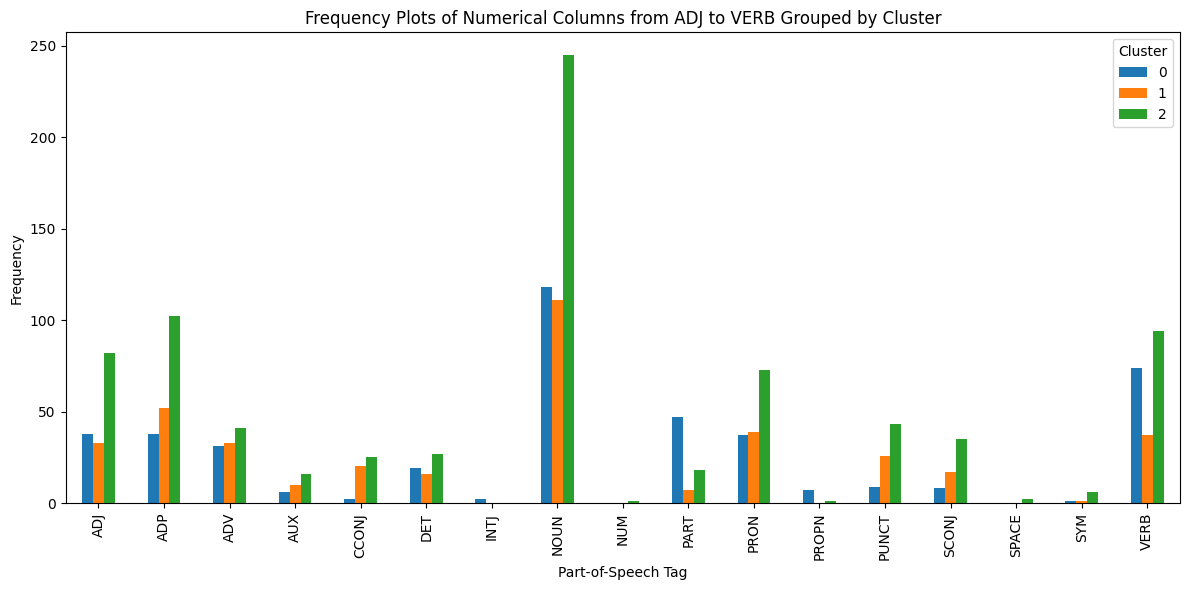

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the sum of each POS tag for each cluster
grouped_data = result_df.groupby('cluster').sum().loc[:, 'ADJ':'VERB'].transpose()

# Plotting
plt.figure(figsize=(12, 6))
grouped_data.plot(kind='bar', figsize=(12, 6))
plt.title('Frequency Plots of Numerical Columns from ADJ to VERB Grouped by Cluster')
plt.ylabel('Frequency')
plt.xlabel('Part-of-Speech Tag')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


When describing a process as opposed to a state, certain word classes (or parts of speech tags) are more commonly used:

1. **Verbs (especially dynamic verbs):** Processes often involve actions or changes over time. Dynamic verbs, as opposed to stative verbs, describe actions, occurrences, or changes. Examples include "run," "build," "transform," and "evolve."

2. **Adverbs:** These can describe how, when, where, or how often a process occurs. Examples include "quickly," "annually," "locally," and "sometimes."

3. **Prepositions:** These can indicate direction, location, or time, which are often relevant in the context of a process. Examples include "through," "across," "before," and "after."

4. **Nouns related to agents or tools:** Processes often involve certain agents (people, organizations) or tools that carry out the action. Examples include "worker," "machine," "software," and "team."

5. **Conjunctions:** These can be used to link different steps or stages in a process. Examples include "then," "next," "after that," and "finally."

6. **Transition words:** These words can help sequence or order the steps in a process. Examples include "firstly," "secondly," "subsequently," and "ultimately."

On the other hand, when describing a state, one might expect:

1. **Stative verbs:** These verbs describe a state or condition rather than an action. Examples include "be," "seem," "know," and "believe."

2. **Adjectives:** These can describe properties or qualities of the state. Examples include "happy," "cold," "rich," and "deep."

3. **Nouns that denote static entities:** Examples include "idea," "belief," "relationship," and "knowledge."

4. **Prepositions that indicate a static position or condition:** Examples include "in," "at," "on," and "with."

In practice, the distinction between process and state can sometimes be subtle, and context plays a crucial role. However, the presence of dynamic verbs, adverbs, and transition words can be strong indicators of a process description.